# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = 'Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'Testing/test-features.txt'
TEST_TARGET_FILE = 'Testing/test-target.txt'

# Load the Data

In [3]:
#Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Token Probability
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

# Calculating the Joint Probability

### The Dot Product

In [4]:
X_test.dot(prob_token_spam).shape

(1724,)

## Set the Prior

$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$

In [5]:
PROB_SPAM = 0.3116

In [6]:
np.log(prob_token_spam)

array([ -4.40759754,  -5.25367234,  -4.99007478, ...,  -9.60931222,
        -8.91616504, -12.09421887])

## Joint Probability in log format

In [7]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [8]:
joint_log_spam[:5]

array([24.28218201,  2.16273802, 20.59295241, 17.75699915, 20.51322915])

$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1 - P(Spam))} {P(X)}$

In [9]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [10]:
joint_log_ham[:5]

array([-60.97225142, -11.01120773, -37.9692142 , -59.13679022,
       -53.79269416])

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center><b>OR</b></center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [11]:
prediction = joint_log_spam > joint_log_ham

In [12]:
prediction[-5:]

array([ True, False, False, False, False])

### Simplify

In [13]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [14]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [15]:
# Accuracy
correct_docs/len(X_test)

0.9773781902552204

In [16]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualising the Results

In [17]:
# Chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

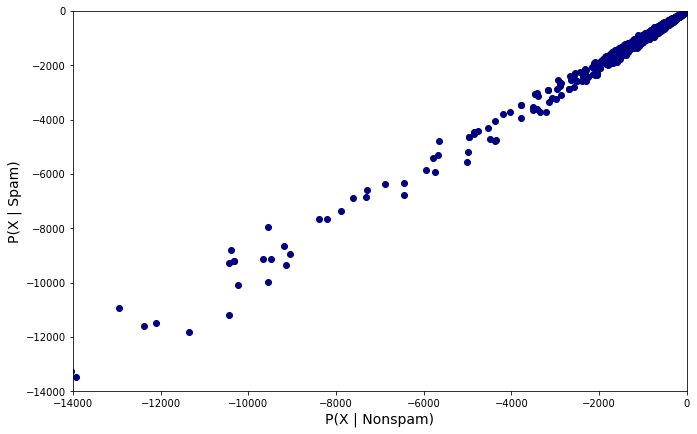

In [18]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary 

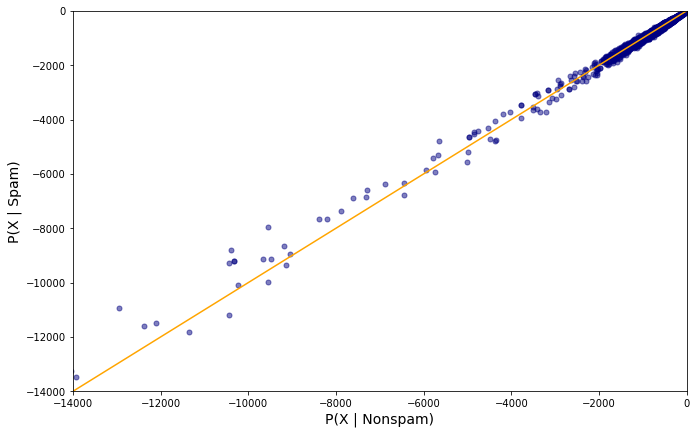

In [19]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

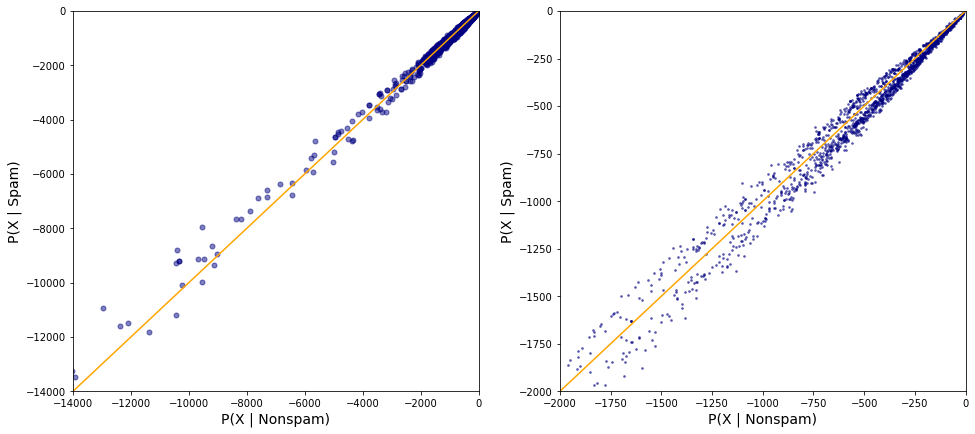

In [20]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [21]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

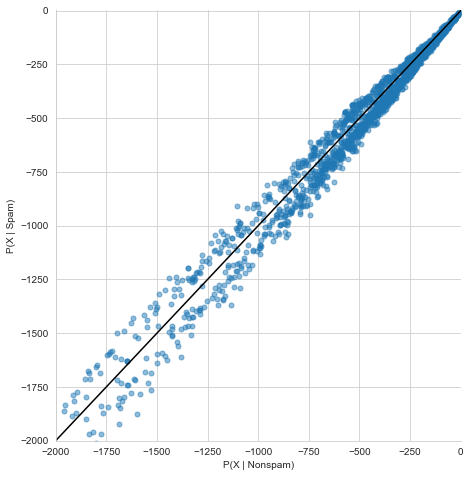

In [31]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, scatter_kws={'alpha': 0.5, 's':25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

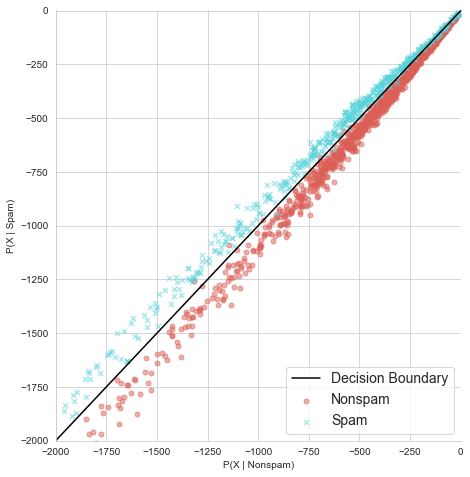

In [38]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, scatter_kws={'alpha': 0.5, 's':25},
          hue=labels, markers=['o', 'x'], palette='hls', legend=False)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

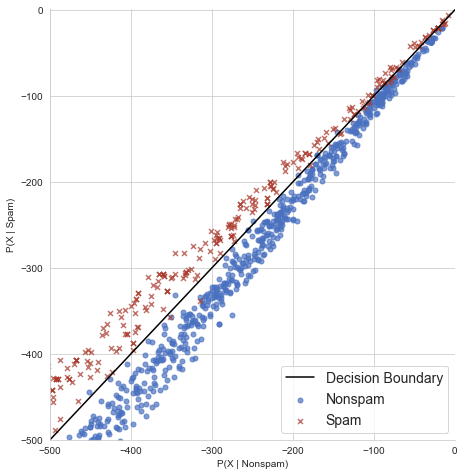

In [43]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, scatter_kws={'alpha': 0.7, 's':25},
          hue=labels, markers=['o', 'x'], palette=my_colours, legend=False)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [44]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [45]:
true_pos = (y_test==1) & (prediction==1)

In [46]:
true_pos.sum()

569

In [47]:
false_pos = (y_test==0) & (prediction==1)
false_pos.sum()

19

In [48]:
false_neg = (y_test==1) & (prediction==0)
false_neg.sum()

20

## Recall Score

In [49]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall Score is {:.2%}'.format(recall_score))

Recall Score is 96.60%


## Precision Score

In [51]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Recall Score is {:.3}'.format(recall_score))

Recall Score is 0.966


## F-Score or F1 Score

In [53]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is: {:.2}'.format(f1_score))

F Score is: 0.97
